# Figure drawing functions for RPB 

This notebook generates figures 4.2, 4.3, 4.4, and 4.5 in chapter 4 in Jialu's thesis. 

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
import pandas as pd
from RPB_model_countercurrent import *

ModuleNotFoundError: No module named 'pyomo'

## Figure 4.2 

MO objectives change with budgets

In [2]:
def read_fim(pre_name, after_name, x_ranges):
    """Read all FIMs in the given ranges, and return the log10(A)- and log10(D)-optimality
    
    Arguments 
    ---------
    pre_name: string, file name pre string 
    after_name: string, file name string after the budget 
    x_ranges: a range of budgets 
    
    Return 
    ------
    a_ranges: a list including log10(trace) of the given budget ranges 
    d_ranges: a list including log10(determinant) of the given budget ranges 
    """
    # initialize A- and D-optimality ranges 
    a_ranges, d_ranges = [], []
    # loop over every budget
    for i in x_ranges:
        # assemble file string names 
        name = pre_name + str(i) + after_name
        # read FIM
        with open(name, 'rb') as f:
            fim = pickle.load(f)
            f.close()
        # get A-optimality ranges and D-optimality ranges
        a_ranges.append(np.log10(np.trace(fim)))
        d_ranges.append(np.log10(np.linalg.det(fim)))
    return a_ranges, d_ranges


In [8]:
# budget ranges used for the paper 
x_set = [ 2000, 2500, 3000, 3500, 4000, 4500, 5000, 
        6000, 7000, 8000,9000,10000] 
# A- and D-optimality ranges
milp_a, milp_d = read_fim("./Countercurrent_results/MO_MILP_solution/updated_fim_", # string name
                          "", # no string after the budget
                          x_set) # budget ranges
print(milp_a, milp_d)

[9.732093014607184, 9.77480216112448, 9.808792591406771, 9.838793418714772, 9.866033621993497, 9.891178066825255, 9.914258483567508, 9.954280356814856, 9.99403001321937, 10.020403228924492, 10.054754900183495, 10.074284218409607] [13.57838298379182, 15.386500919101064, 15.56777735385663, 16.5303900490576, 16.823529170505108, 17.31280490606632, 17.500045583482198, 18.13037276601848, 18.587507617709473, 19.36148092114499, 19.782723591202075, 19.656861801509468]


In [18]:
def plot_MO_data(x=None, a_nlp=None, d_nlp=None, 
             objective = "A", benchmark_x=None, benchmark_a=None, benchmark_d=None, save=None):
    """
    objective means these solutions are based on what objective function. 
    For e.g., if it's A, it means it's A-optimality solution. We can still analyze its determinant value. 
    
    Arguments
    ---------
    x: budget range 
    a_nlp: log10(trace) of all budgets 
    d_nlp: log10(det) of all budgets 
    objective: "A" for A-optimality, "D" for D-optimality 
    benchmark_x: benchmark solution budgets 
    benchmark_a: benchmark solution A-optimality 
    benchmark_d: benchmark solution D-optimality 
    save: if True, save the fig
    """
    # set up legends for NLP
    label_nlp = "NLP: A-optimality"
    color_minlp = "red"
    scatter_minlp = "*"
    color_nlp = "blue"
    scatter_nlp = "."
    marker_size=200
        
    # set up fonts 
    si=18
    plt.rc('axes', titlesize=si)
    plt.rc('axes', labelsize=si)
    plt.rc('xtick', labelsize=si)
    plt.rc('ytick', labelsize=si)
    si_legend = 16
        
    # A-optimality figure
    # A-optimality MO solution 
    if a_nlp is not None:
        plt.scatter(x, a_nlp, color=color_minlp, 
                 s=marker_size, marker=scatter_minlp, label=label_nlp)
    # A-optimality benchmark solution 
    if benchmark_a is not None:
        plt.scatter(benchmark_x, benchmark_a, color = color_nlp, s=marker_size, marker=scatter_nlp)
           
    plt.xlabel('Budget $k', fontweight="bold")
    plt.ylabel('log$_{10}$(A-optimality)', fontweight="bold")
    #plt.legend(loc="lower right", fontsize=si_legend)
    plt.tight_layout()
    if save is not None:
        plt.savefig(save+'_trace.pdf')
    plt.show()
    

    # D-optimality optimal solution 
    # D-optimality MO solution 
    if d_nlp is not None: 
        #plt.plot(x, d_nlp, linestyle="-", color=color_nlp, markersize=marker_size, marker=scatter_nlp, label=label_nlp)
        plt.scatter(x, d_nlp, color=color_minlp, 
                 s=marker_size, marker=scatter_minlp, label=label_nlp)
    # D-optimality benchmark solution
    if benchmark_d is not None:
        plt.scatter(benchmark_x, benchmark_d, color = color_nlp, s=marker_size, marker=scatter_nlp)
    
    plt.xlabel('Budget $k', fontweight="bold")
    plt.ylabel('log$_{10}$(D-optimality)', fontweight="bold")
    #plt.legend(loc="lower right", fontsize=si_legend)
    plt.tight_layout()
    if save is not None:
        plt.savefig(save+'_det.pdf')
    plt.show()


In [14]:
def load_pickle(name): 
    """Used for loading data from pickle file 
    """
    file = open(name, "rb")
    data = pickle.load(file)
    file.close()
    return data
def save_pickle(data, name):
    """Used for saving data to pickle file 
    """
    file = open(name, "wb")
    pickle.dump(data, file)
    file.close()

In [16]:
# benchmark ranges 
ben_a = [1.6, 2.6, 3.6, 4.6, 5.4, 6.4]

# benchmark A-optimality solutions 
a = load_pickle("./Countercurrent_results/MO_MILP_solution/benchmark_a")
# benchmark D-optimality solutions
d = load_pickle("./Countercurrent_results/MO_MILP_solution/benchmark_a")

a = [np.log10(i) for i in a]
d = [np.log10(i) for i in d]

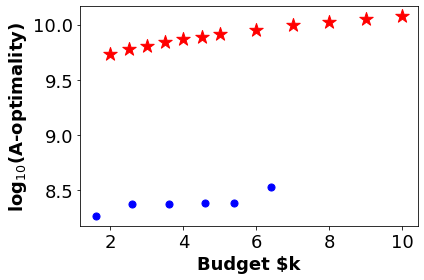

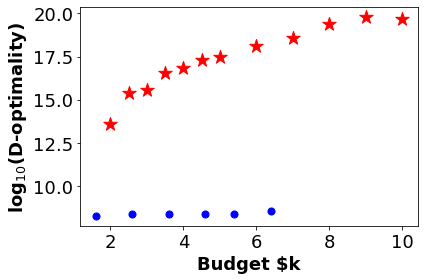

In [19]:
plot_MO_data(x=[i/1000 for i in x_set], a_nlp=milp_a, d_nlp=milp_d, 
             objective = "A", 
          benchmark_x = ben_a, 
          benchmark_a = a, 
          benchmark_d = d, 
          save="MILP")


## Figure 4.4 MBDoE heatmap 

In [20]:
def heatmap(
        cri_a, 
        cri_d, 
        title_text,
        xlabel_text,
        ylabel_text,
        font_axes=18,
        font_tick=18,
        log_scale=True,
        save=None
    ):
    """
    Draw heatmap. Adapted from Pyomo.DoE: 
    https://github.com/Pyomo/pyomo/blob/9608e0e649b0f7763cc65d2232da8aeb5899f156/pyomo/contrib/doe/result.py#L603
    
    Arguments
    ----------
    cri_a: A-optimality in the range 
    cri_d: D-optimality in the range
    title_text: name of the figure, a string
    xlabel_text: x label title, a string.
        In a 2D heatmap, it should be the second design variable in the design_ranges
    ylabel_text: y label title, a string.
        In a 2D heatmap, it should be the first design variable in the dv_ranges
    font_axes: axes label font size
    font_tick: tick label font size
    log_scale: if True, the result matrix will be scaled by log10

    Returns
    --------
    4 Figures of 2D heatmap for each criteria
    """
    # decide if log scaled
    if log_scale:
        hes_a = np.log10(cri_a)
        hes_d = np.log10(cri_d)
    else:
        hes_a = cri_a
        hes_d = cri_d

    # set heatmap x,y ranges
    xLabel = x_range
    yLabel = y_range

    # A-optimality
    fig = plt.figure()
    plt.rc('axes', titlesize=font_axes)
    plt.rc('axes', labelsize=font_axes)
    plt.rc('xtick', labelsize=font_tick)
    plt.rc('ytick', labelsize=font_tick)
    ax = fig.add_subplot(111)
    params = {'mathtext.default': 'regular'}
    plt.rcParams.update(params)
    ax.set_yticks(range(len(yLabel)))
    ax.set_yticklabels(yLabel)
    ax.set_ylabel(ylabel_text)
    ax.set_xticks(range(len(xLabel)))
    ax.set_xticklabels(xLabel)
    ax.set_xlabel(xlabel_text)
    im = ax.imshow(hes_a, cmap=plt.cm.hot_r)
    ba = plt.colorbar(im)
    ba.set_label('log$_{10}$(trace(FIM))')
    plt.tight_layout()
    if save is not None:
        plt.savefig(save+'_trace.pdf')
    plt.show()

    # D-optimality
    fig = plt.figure()
    plt.rc('axes', titlesize=font_axes)
    plt.rc('axes', labelsize=font_axes)
    plt.rc('xtick', labelsize=font_tick)
    plt.rc('ytick', labelsize=font_tick)
    ax = fig.add_subplot(111)
    params = {'mathtext.default': 'regular'}
    plt.rcParams.update(params)
    ax.set_yticks(range(len(yLabel)))
    ax.set_yticklabels(yLabel)
    ax.set_ylabel(ylabel_text)
    ax.set_xticks(range(len(xLabel)))
    ax.set_xticklabels(xLabel)
    ax.set_xlabel(xlabel_text)
    im = ax.imshow(hes_d, cmap=plt.cm.hot_r)
    ba = plt.colorbar(im)
    ba.set_label('log$_{10}$(det(FIM))')
    plt.tight_layout()
    if save is not None:
        plt.savefig(save+'_det.pdf')
    plt.show()

In [22]:
res_a = load_pickle("./Countercurrent_results/MBDoE_results/heatmap_a")
res_d = load_pickle("./Countercurrent_results/MBDoE_results/heatmap_d")

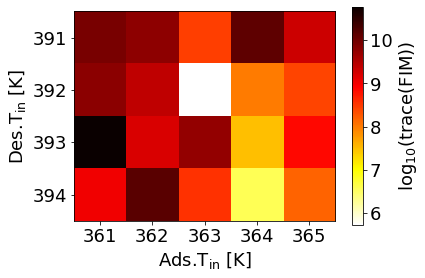

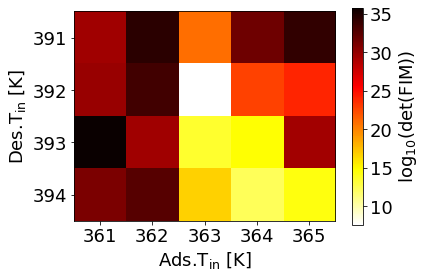

In [23]:
# specify x, y ranges
x_range = [361, 362, 363, 364, 365]
y_range = [391, 392, 393, 394]


heatmap(res_a, res_d, "heatmap-", "Ads.T$_{in}$ [K]", "Des.T$_{in}$ [K]", log_scale=False, 
        save="heatmap-")

## Figure 4.3 

In [ ]:
# create pyomo model
RPB = full_model_creation(lean_temp_connection=True, configuration = "counter-current")

In [ ]:
# load a previous solution and solve
#from_json(RPB, fname="./BaseCase0213/base case solution 021324.json.gz", gz=True)
#from_json(RPB, fname="./MBDOE_sens_001/Tgin_des_391_001/Tgin_ads_365/Tgads365_Tgdes391_base.json.gz")
from_json(RPB, fname="./MBDOE_sens_001/Tgin_des_393_001/Tgin_ads_361/Tgads361_Tgdes393_base.json.gz")
#from_json(RPB, fname="./MBDOE_sens/Tgin368 Tgout391 mar7.json.gz", gz=True)

In [ ]:
y_ref = full_contactor_plotting(RPB, with_legend=False, save_option=True)

In [ ]:
model_plot_Tg_RKH(RPB.des)